In [7]:
import pandas as pd
import re

# Carica il file Excel
df = pd.read_excel('classification.xlsx')  # sostituisci con il nome corretto
print("counts of predictions:", df['prediction'].count())

# Funzione per estrarre l'etichetta finale (maiuscola) dalla colonna 'prediction'
def extract_label(text):
    # Cerca la parola maiuscola finale (es. EUPHEMISM)
    match = re.search(r'([A-Z:]+)\.?["\']?$', text.strip())
    if match:
        return match.group(1)
    else:
        return None

# Applica la funzione alla colonna prediction
df['label'] = df['prediction'].apply(extract_label)

# Calcola la distribuzione delle etichette
distribution = df['label'].value_counts(normalize=True) * 100

# Stampa la distribuzione in percentuale
print("Distribution of extracted labels (%):")
print(distribution.sort_index())


counts of predictions: 278
Distribution of extracted labels (%):
label
ANALOGY      14.388489
ASSERTION    11.510791
EUPHEMISM     1.798561
HYPERBOLE     1.798561
OTHER         6.474820
PARADOX      21.942446
QUESTION     16.187050
SHIFT        25.899281
Name: proportion, dtype: float64


In [8]:
distribution.index

# rename SHIFT to EX:CONTEXT SHIFT
distribution = distribution.rename({'SHIFT': 'CONTEXT SHIFT'})
# rename QUESTION TO RHETORICAL QUESTION
distribution = distribution.rename({'QUESTION': 'RHETORICAL QUESTION'})
# rename ASSERTION to IM:FALSE ASSERTION
distribution = distribution.rename({'ASSERTION': 'FALSE ASSERTION'})
# rename PARADOX to EX:OXYMORON PARADOX
distribution = distribution.rename({'PARADOX': 'OXYMORON PARADOX'})

C:\Users\micha\AppData\Local\Temp\ipykernel_32104\2071707510.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distribution.values, y=distribution.index, palette="viridis")
C:\Users\micha\AppData\Local\Temp\ipykernel_32104\2071707510.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


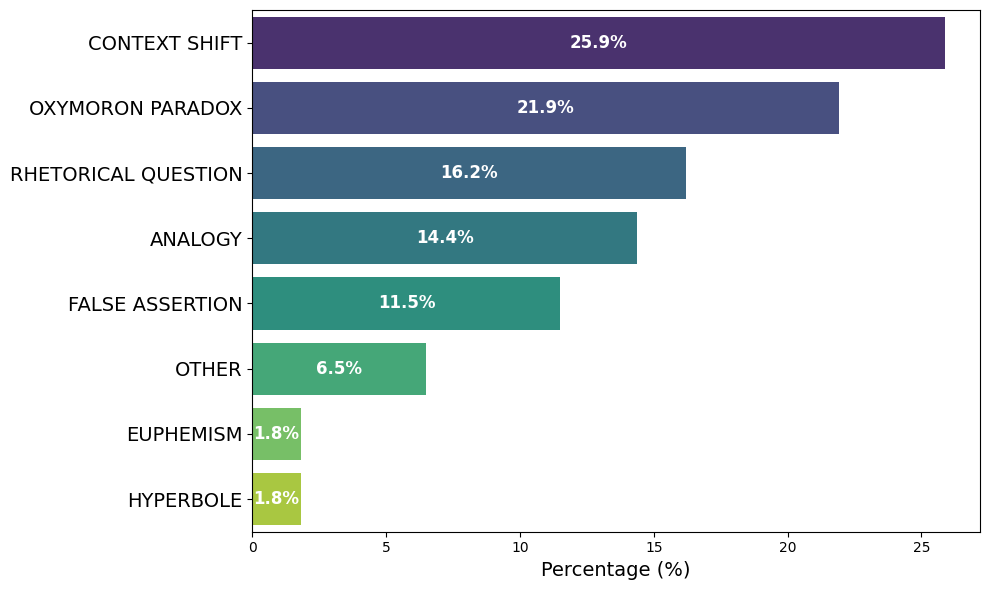

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=distribution.values, y=distribution.index, palette="viridis")

# Ingrandisce le etichette degli assi
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('', fontsize=14)

# Ingrandisce le etichette dell'asse Y (nomi delle figure retoriche)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Aggiunge le percentuali dentro le barre con testo più grande
for i, value in enumerate(distribution.values):
    plt.text(value / 2, i, f"{value:.1f}%", color='white', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig("multpico_distribution.svg", format="svg")
plt.show()
